In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import plotly.express as px
import fitz 

T-SNE and values counts

In [15]:
list_label = ['lens hood',
              'cosmetic philosophy set',
              'loafers',
              'fashionable boots',
              'helmet and acessory',
              'motobike wet cover',
              'sticker logo badge',
              'backup charger and battery', 
              'phone case and back cover and sticker',
              'watch strap',
              ]

list_path = sorted(os.listdir('/data/datasets/HOVA10/train'))

dict_label = dict(zip(list_path,list_label))


In [16]:
data = []
label = []
split = []
width = []
height = []
def read_image(dir):
    pos = ['train', 'val']
    for i in pos:
        folders = sorted(os.listdir(os.path.join(dir,i)))
        for folder in folders: 
            image_paths = os.listdir(os.path.join(dir,i,folder))
            for path in image_paths:
                image_path = os.path.join(dir,i,folder,path)
                try:
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    image = cv2.resize(image,(224,224))
                    data.append(image.flatten())
                    label.append(dict_label[folder])
                    split.append('validation' if i == 'val' else i)
                    h,w = image.shape[0], image.shape[1]
                    height.append(h)
                    width.append(w)       
                except:
                    print("can't read image path: "+ image_path)
                    continue
    print("OK")


In [17]:
read_image("/data/datasets/HOVA10")

OK


In [18]:
data = np.array(data)
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

In [19]:
df = pd.DataFrame({
    'Dimension 1': data_tsne[:, 0],
    'Dimension 2': data_tsne[:, 1],
    'Label': label
})

In [20]:
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', color='Label',
                 title='t-SNE Visualization ',
                 labels={'Label': 'Category'})
fig.update_layout(
    font=dict(
        family="Times New Roman",
        size=14,  # Thay đổi cỡ chữ nếu cần
        color="Black"
    ),
    width=1000,  
    height=500
)

# Hiển thị đồ thị
fig.write_image("tsne_visualization.pdf")
fig.show()


Distribution 


In [7]:
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 10

df = pd.DataFrame({'label': label, 'split': split})
value_counts = df.groupby(['label', 'split']).size().unstack(fill_value=0)

# Vẽ biểu đồ số lượng mẫu cho từng lớp với phân biệt train và validation
value_counts.plot(kind='bar', figsize=(12,6), color=['skyblue', 'lightgreen'])
plt.xlabel('Class name')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples by Class and Split (Train vs Validation)')
plt.xticks(rotation=30, ha='right', fontsize=7)
plt.legend(title='Data Split')

# Lưu hình ảnh với điều chỉnh
plt.savefig('result/value-counts.pdf', bbox_inches='tight', pad_inches=0.1)


NameError: name 'label' is not defined

Resolution


In [2]:
width = []
height = []
def read_image(dir):
    pos = ['train', 'val']
    for i in pos:
        folders = sorted(os.listdir(os.path.join(dir,i)))
        for folder in folders: 
            image_paths = os.listdir(os.path.join(dir,i,folder))
            for path in image_paths:
                image_path = os.path.join(dir,i,folder,path)
                try:
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    h,w = image.shape[0], image.shape[1]
                    height.append(h)
                    width.append(w)       
                except:
                    print("can't read image path: "+ image_path)
                    continue
    print("OK")
read_image("/data/datasets/HOVA10")

OK


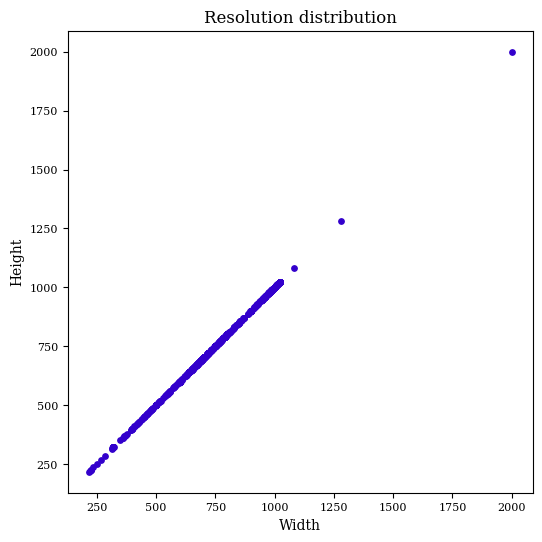

In [4]:
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(6,6))
plt.title('Resolution distribution', fontsize= 12)
plt.xlabel('Width')
plt.ylabel('Height')
plt.tick_params(axis='x', labelsize=8)  # Điều chỉnh trục x
plt.tick_params(axis='y', labelsize=8)  # Điều chỉnh trục y
plt.scatter(height,width, color ="#3300CC", marker ="o", s=15)

plt.savefig('result/resolution.pdf',bbox_inches='tight', pad_inches=0.1)

brightness


In [30]:
def cal_histogram(start, end, path):
    # Số lượng bins, mỗi bin đại diện cho 10 pixel
    bin_size = 5
    num_bins = (end - start) // bin_size

    # Khởi tạo mảng bins
    bins = np.zeros((num_bins, 1))
    total = 0

    for item in os.listdir(path):
        folders = os.path.join(path, item)
        for image in os.listdir(folders):
              try:
                  img = cv2.imread(os.path.join(folders, image))
                  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    # Tính tổng số điểm ảnh
                  total += img.shape[0] * img.shape[1]

                    # Tính toán histogram với số bins đã điều chỉnh
                  hist = cv2.calcHist([img], [0], None, [num_bins], [start, end])
                  bins += hist
              except:
                  continue
    return bins

# Sử dụng hàm
bins_train = cal_histogram(0, 256, '/data/datasets/HOVA10/train')
bins_val = cal_histogram(0, 256, '/data/datasets/HOVA10/val')
bins_train, bins_val = bins_train.reshape(-1), bins_val.reshape(-1)
bins_train.shape, bins_val.shape

((51,), (51,))

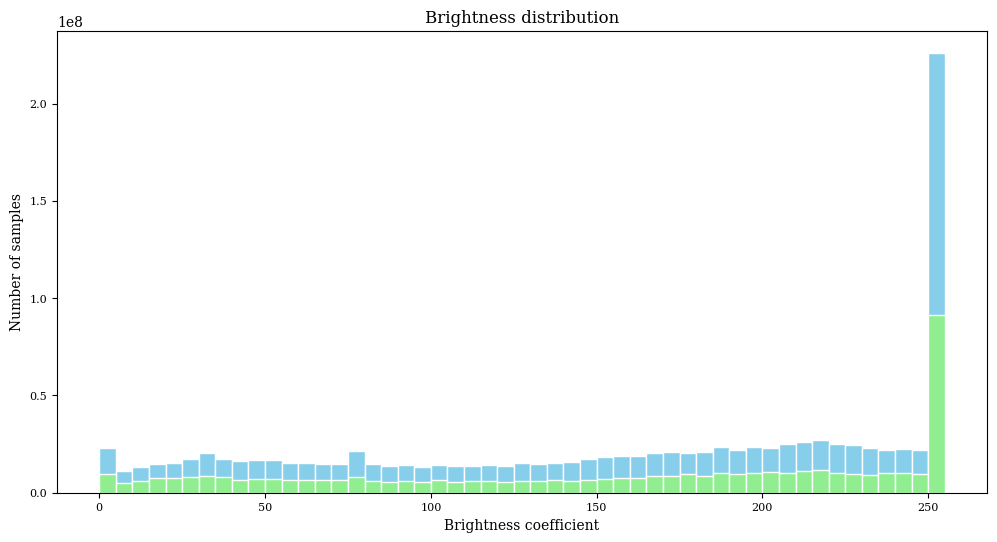

In [32]:
plt.figure(figsize=(12,6))
plt.title('Brightness distribution', fontsize= 12)
plt.xlabel('Brightness coefficient')
plt.ylabel('Number of samples')
x_val = np.arange(0,255,5)
bar_width = 5
x_val = x_val + bar_width / 2
plt.tick_params(axis='x', labelsize=8)  # Điều chỉnh trục x
plt.tick_params(axis='y', labelsize=8)  # Điều chỉnh trục y
plt.bar(x_val, bins_train, width=bar_width, color ="skyblue",  edgecolor="white")
plt.bar(x_val, bins_val, width=bar_width, color ="lightgreen",  edgecolor="white")

plt.savefig('brightness.pdf',bbox_inches='tight', pad_inches=0.1)

Tree type code

In [2]:
def read_pdf(pdf_path, page_num=0):
    """
    Đọc file PDF và chuyển đổi một trang thành hình ảnh để hiển thị bằng matplotlib.
    
    Args:
        pdf_path (str): Đường dẫn đến file PDF.
        page_num (int): Số trang cần chuyển thành hình ảnh (bắt đầu từ 0).
        
    Returns:
        img: Hình ảnh của trang PDF dưới dạng mảng numpy.
    """
    # Mở file PDF
    pdf_document = fitz.open(pdf_path)
    
    # Lấy số trang
    total_pages = pdf_document.page_count
    if page_num >= total_pages:
        raise ValueError(f"Trang {page_num} không tồn tại trong PDF. PDF chỉ có {total_pages} trang.")

    # Lấy trang cụ thể
    page = pdf_document.load_page(page_num)
    
    # Chuyển đổi trang thành ảnh pixmap
    pix = page.get_pixmap()

    # Chuyển dữ liệu từ pixmap thành mảng NumPy
    img = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.height, pix.width, pix.n)
    
    # Hiển thị hình ảnh sử dụng matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='gray' if pix.n == 1 else None)
    plt.axis('off')  # Tắt trục tọa độ
    plt.show()

    # Trả về mảng ảnh để có thể xử lý thêm nếu cần
    return img

In [5]:
from anytree import Node, RenderTree
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

root = Node("Object {7}")

motobike = Node("Motobike {2}", parent=root)
motobike1 = Node("Motobike acessory {2}", parent=motobike)
motobike2 = Node("Helmet and helmet acessory {191}", parent=motobike) #paste number of image here
motobike1a = Node("Motobike wet cover {130}", parent=motobike1) #paste number of image here
motobike1b = Node("Sticker and logo and badge {278}", parent=motobike1) #paste number of image here

men = Node("Men's shoes {1}", parent=root)

phone = Node("Phone and phone accessory {1}", parent=root)

travel = Node("Travel furniture and Luggage {1}", parent=root)

watch = Node("Watch {1}", parent=root)

women = Node("Women's shoes {1}", parent=root)


In [6]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Tạo hàm để hiển thị cây với ký hiệu mũi tên và lùi vào từng cấp độ
def get_custom_tree_output(node):
    output_lines = []
    for pre, fill, node in RenderTree(node):
        level = len(pre.split(' ')) - 1  # Đếm số khoảng trắng để xác định cấp độ
        if node.is_root:
            output_lines.append(f"{' ' * level * 4}• {node.name}")  # Mũi tên cho nút gốc
        elif node.children:  # Kiểm tra xem nút có nhánh con không
            output_lines.append(f"{' ' * level * 4}• {node.name}")  # Mũi tên trỏ xuống cho các nút có nhánh con
        else:
            output_lines.append(f"{' ' * level * 4}• {node.name}")  # Mũi tên nằm ngang cho các nút không có nhánh con
    return output_lines

# Tạo PDF và lưu cây vào file PDF
def save_tree_to_pdf(filename, lines, font_name="Times-Roman"):
    c = canvas.Canvas(filename, pagesize=letter)
    width, height = letter  # Kích thước trang
    c.setFont(font_name, 13)
    
    # Tính toán vị trí căn giữa cho văn bản
    line_height = 30
    text_width = max(c.stringWidth(line, font_name, 13) for line in lines)
    total_text_height = len(lines) * line_height
    
    if total_text_height > height:
        raise ValueError("Nội dung quá lớn để vừa vào trang PDF.")
    
    start_y = (height - total_text_height) / 2
    y_position = start_y
    
    for line in lines:
        c.drawString((width - text_width) / 2, y_position, line)
        y_position -= line_height
    
    c.save()

# Ví dụ sử dụng:
# node = some_tree_structure
# lines = get_custom_tree_output(node)
# save_tree_to_pdf("tree_output.pdf", lines)


In [7]:
tree_output = get_custom_tree_output(root)

# Lưu vào file PDF với font Times-Roman
save_tree_to_pdf("result/tree.pdf", tree_output, font_name="Times-Roman")

print("Cây dữ liệu đã được lưu vào tree_output.pdf")

Cây dữ liệu đã được lưu vào tree_output.pdf


In [8]:
 # PyMuPDF

def crop_pdf(input_pdf_path, output_pdf_path):
    # Mở file PDF đầu vào
    pdf_document = fitz.open(input_pdf_path)
    
    # Lấy trang đầu tiên
    page = pdf_document.load_page(0)
    
    # Lấy kích thước của trang
    original_rect = page.rect

    # Tìm vùng chứa nội dung
    text_instances = page.search_for(" ")
    if text_instances:
        # Tính toán vùng chứa nội dung
        bbox = fitz.Rect()
        for inst in text_instances:
            bbox = bbox | fitz.Rect(inst)
        
        # Điều chỉnh bbox để cắt bỏ phần thừa bên phải
        # Thay đổi kích thước của bbox
        bbox.x1 = min(bbox.x1+35, original_rect.x1 + original_rect.width)
        
        # Cập nhật kích thước của trang theo bbox
        page.set_cropbox(bbox)

    # Tạo file PDF đầu ra
    pdf_document.save(output_pdf_path)
    pdf_document.close()

# Sử dụng hàm
input_pdf = "result/tree.pdf"
output_pdf = "result/tree_output.pdf"
crop_pdf(input_pdf, output_pdf)


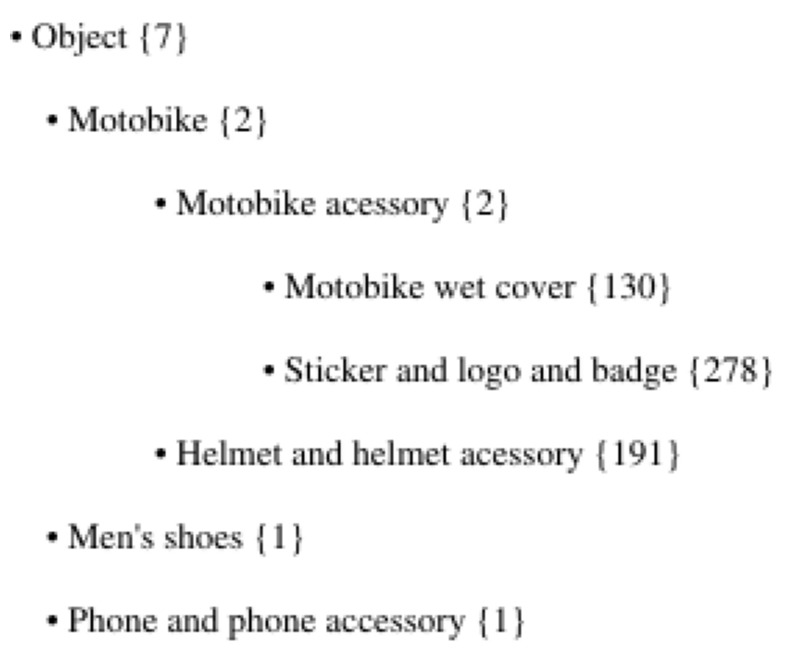

(228, 279, 3)

In [9]:
read_pdf('result/tree_output.pdf').shape

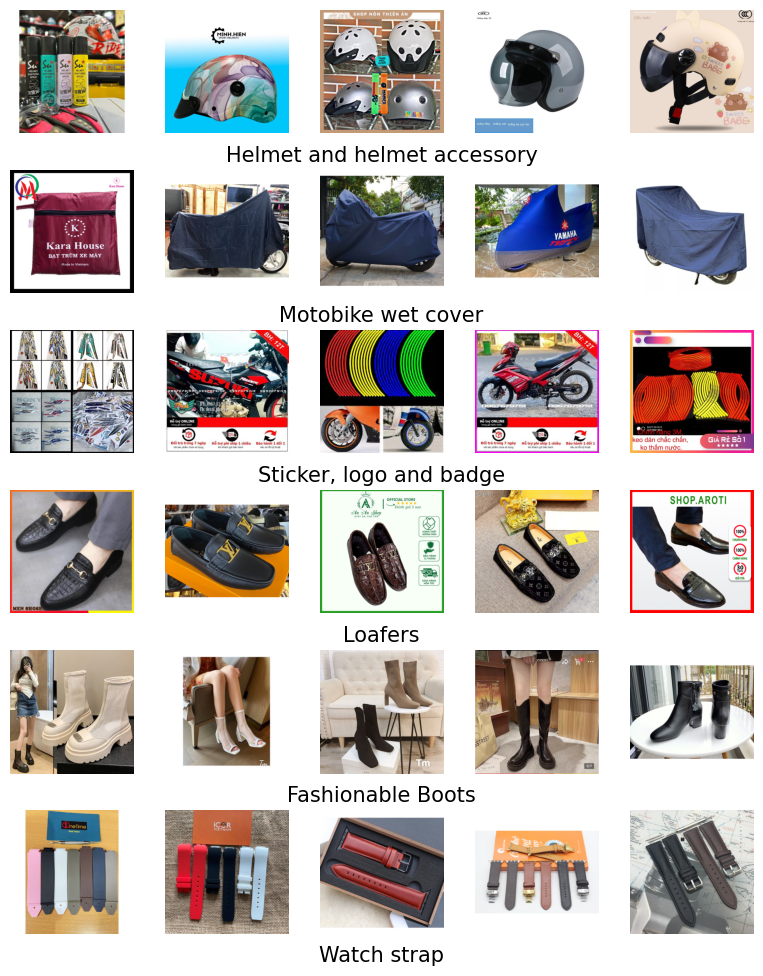

In [10]:
import os
import cv2
import matplotlib.pyplot as plt

selected_images_per_folder = {}

# Hàm để đọc ảnh
def read_img():
    paths = ['/data/datasets/HOVA10/train/Mô_tô,_xe_máy__Mũ_bảo_hiểm_&_Phụ_kiện',
             '/data/datasets/HOVA10/train/Mô_tô,_xe_máy__Phụ_kiện_xe_máy__Bạt_phủ',
             '/data/datasets/HOVA10/train/Mô_tô,_xe_máy__Phụ_kiện_xe_máy__Hình_dán,_logo,_huy_hiệu',
             '/data/datasets/HOVA10/train/Giày_Dép_Nam__Giày_tây_lười',
             '/data/datasets/HOVA10/train/Giày_Dép_Nữ__Bốt__Bốt_thời_trang',
             '/data/datasets/HOVA10/train/Đồng_Hồ__Phụ_kiện_đồng_hồ__Dây_đồng_hồ']
    
    for path in paths:
        imgs = os.listdir(path)
        folder_images = []
        
        for i in range(5, 10):
            img_path = os.path.join(path, imgs[i])
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển từ BGR sang RGB
                folder_images.append(img)
        
        selected_images_per_folder[path] = folder_images

# Gọi hàm để đọc ảnh
read_img()

# Lớp của các thư mục (chỉ là tên hiển thị)
folders = ['Helmet and helmet accessory', 'Motobike wet cover', 'Sticker, logo and badge', "Loafers",
           "Fashionable Boots", "Watch strap"]

# Thiết lập subplot với kích thước và không gian hợp lý
fig, axs = plt.subplots(6, 5, figsize=(10, 12),
                        gridspec_kw={'height_ratios': [4, 4, 4, 4, 4, 4]})  # Mỗi hàng sẽ có 5 ô, trong đó 1 ô cho tiêu đề

# Lặp qua từng lớp
for row_idx, (folder, images) in enumerate(zip(folders, selected_images_per_folder.values())):
    # Thêm hình ảnh vào 5 cột đầu tiên của mỗi hàng
    for col_idx, img in enumerate(images):
        axs[row_idx, col_idx].imshow(img)
        axs[row_idx, col_idx].axis('off')  # Ẩn trục cho hình ảnh

    # Thêm tiêu đề ở dưới mỗi hình ảnh
    for col_idx in range(5):
        if col_idx != 2:
            continue
        axs[row_idx, col_idx].text(0.5, -0.1, folder, fontsize=15,
                                   ha='center', va='top', transform=axs[row_idx, col_idx].transAxes)

plt.subplots_adjust(wspace=0, hspace=0.3)  # Tạo khoảng cách dọc giữa các hàng để có đủ không gian cho tiêu đề

# Lưu kết quả dưới dạng PDF
plt.savefig('result/overview.pdf', bbox_inches='tight', pad_inches=0.3)


In [11]:
def get_page_size(pdf_path):
    # Mở file PDF
    pdf_document = fitz.open(pdf_path)
    
    # Lấy trang đầu tiên
    page = pdf_document.load_page(0)
    
    # Lấy kích thước của trang
    rect = page.rect
    width = rect.width
    height = rect.height
    
    # Đóng tài liệu
    pdf_document.close()
    
    return width, height
print(get_page_size('result/tree_output.pdf'), " ", get_page_size('result/overview.pdf'))

(278.5810546875, 227.342041015625)   (578.3040161132812, 731.8660278320312)


In [12]:
import fitz  # PyMuPDF
import io

def resize_and_merge_pdfs_horizontal(pdf1_path, pdf2_path, output_path):
    # Mở hai file PDF
    pdf1 = fitz.open(pdf1_path)
    pdf2 = fitz.open(pdf2_path)

    # Mở trang đầu của cả hai file PDF
    page1 = pdf1[0]
    page2 = pdf2[0]

    # Lấy kích thước của các trang
    rect1 = page1.rect
    rect2 = page2.rect

    # Xác định kích thước trang lớn nhất
    new_width = max(rect1.width, rect2.width)
    new_height = max(rect1.height, rect2.height)

    # Kích thước mong muốn cho trang nhỏ hơn
    target_height = 2 / 3 * new_height

    # Tạo một file PDF mới
    output_pdf = fitz.open()
    output_page = output_pdf.new_page(width=new_width * 2, height=new_height)

    # Resize và chèn trang đầu tiên
    if rect1.width < new_width or rect1.height < new_height:
        # Tính toán tỷ lệ cho resize
        scale_x = new_width / rect1.width
        scale_y = target_height / rect1.height
        scale = min(scale_x, scale_y)  # Giữ tỷ lệ của ảnh

        matrix1 = fitz.Matrix(scale, scale)
        pixmap1 = page1.get_pixmap(matrix=matrix1)

        # Thêm khoảng trắng cho trang nhỏ hơn
        img_bytes1 = pixmap1.tobytes()
        output_page.insert_image(fitz.Rect(0, (new_height - target_height) / 2, new_width, (new_height - target_height) / 2 + target_height), stream=io.BytesIO(img_bytes1))
    else:
        # Chèn trang đầu tiên mà không resize
        output_page.insert_image(fitz.Rect(0, 0, rect1.width, rect1.height), stream=page1.get_pixmap().tobytes())

    # Resize và chèn trang thứ hai
    if rect2.width < new_width or rect2.height < new_height:
        # Tính toán tỷ lệ cho resize
        scale_x = new_width / rect2.width
        scale_y = target_height / rect2.height
        scale = min(scale_x, scale_y)  # Giữ tỷ lệ của ảnh

        matrix2 = fitz.Matrix(scale, scale)
        pixmap2 = page2.get_pixmap(matrix=matrix2)

        # Thêm khoảng trắng cho trang nhỏ hơn
        img_bytes2 = pixmap2.tobytes()
        output_page.insert_image(fitz.Rect(new_width, (new_height - target_height) / 2, new_width * 2, (new_height - target_height) / 2 + target_height), stream=io.BytesIO(img_bytes2))
    else:
        # Chèn trang thứ hai mà không resize
        output_page.insert_image(fitz.Rect(new_width, 0, new_width * 2, new_height), stream=page2.get_pixmap().tobytes())

    # Lưu file PDF kết quả
    output_pdf.save(output_path)
    output_pdf.close()
    pdf1.close()
    pdf2.close()

# Sử dụng hàm với đường dẫn đến file PDF của bạn
resize_and_merge_pdfs_horizontal('result/tree_output.pdf', 'result/overview.pdf', 'result/data_overview.pdf')


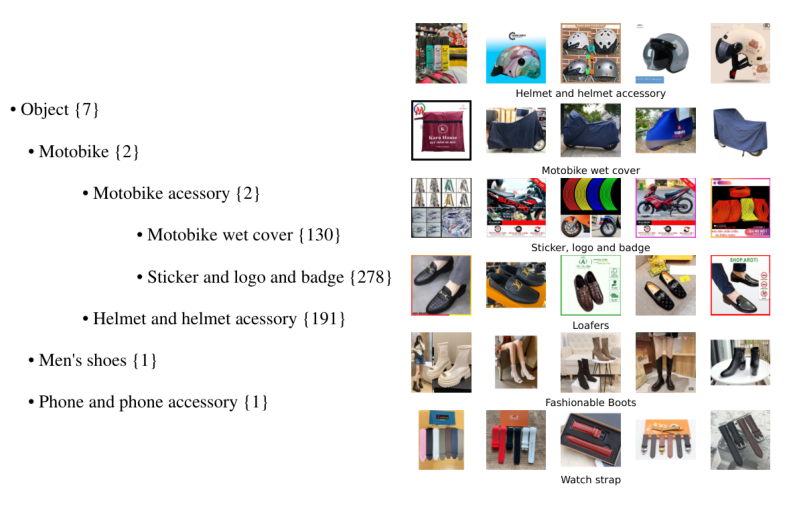

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [13]:
read_pdf("result/data_overview.pdf")

word cloud

In [352]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function for changing the color of the text
def one_color_func(word=None, font_size=None, 
                   position=None, orientation=None, 
                   font_path=None, random_state=None):
    # This HSL is for the green color
    h = 99
    s = 62
    l = 45
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Give the whole path of the text file, open it, read it, and encode it.
text = open('/data/datasets/Long-Workspace/ecom-product/HOVA10Labels.txt', 
            mode='r', encoding='utf-8').read()

# The Image shape in which you wanna convert it to.
mask = np.array(cv2.imread('/data/datasets/Long-Workspace/ecom-product/HOVA10.png'))

# Adjust WordCloud parameters
wc = WordCloud(
    stopwords=STOPWORDS,
    mask=mask,
    background_color="white",
    max_words=300,  # Giới hạn số lượng từ tối đa
    min_font_size=100,  # Kích thước font nhỏ nhất
    max_font_size=200,  # Kích thước font lớn nhất
    prefer_horizontal=0.5,  # Tỷ lệ từ nằm ngang
    random_state=42,
    width=mask.shape[1],
    height=mask.shape[0],
    color_func=one_color_func
)

# Generate the word cloud
wc.generate(text)

# Save the word cloud to a PDF file
plt.figure(figsize=(wc.width / 100, wc.height / 100), dpi=100)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('wordcloud_output.pdf', format='pdf')
plt.close()


Visualize Histogram

In [2]:
root = "/data/datasets/Long-Workspace/ecom-product/Eval-data"

In [3]:
def read_2lv_dataset(start, end, path):
    bins = np.zeros((end-start,1))
    total = 0
    lv1s = os.listdir(os.path.join(path))
    for lv1 in lv1s:
        try:
            lv2s = os.listdir(os.path.join(path, lv1))
            for lv2 in lv2s:
                try:
                    
                    image_paths = os.listdir(os.path.join(path, lv1, lv2))
                 
                    for image_path in image_paths:          
                        image = cv2.imread(os.path.join(path,lv1, lv2, image_path))
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                        
                    total += image.shape[0] * image.shape[1]
                    hist = cv2.calcHist([image], [0], None, [end-start], [start,end])
                    bins += hist  
                   
                except:
                    continue
        except:
            continue
   
    return bins / total * 100


In [5]:
def read_3lv_dataset(start, end, path):
    bins = np.zeros((end-start,1))
    total = 0
    lv1s = os.listdir(os.path.join(path))
    for lv1 in lv1s:
        try:
            lv2s = os.listdir(os.path.join(path, lv1))
            for lv2 in lv2s:
                try:
                    lv3s = os.listdir(os.path.join(path, lv1, lv2))
                    for lv3 in lv3s:
                        try:
                            image_paths = os.listdir(os.path.join(path, lv1, lv2, lv3))
                            for image_path in image_paths:          
                                image = cv2.imread(os.path.join(path,lv1, lv2, lv3, image_path))
                                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                                
                                
                            total += image.shape[0] * image.shape[1]
                            hist = cv2.calcHist([image], [0], None, [end-start], [start,end])
                            bins += hist
                        
                        except:
                            continue
                except:
                    continue
        except:
            continue
    return bins / total * 100


In [6]:
def show_hist_fig(str, hist):
    plt.figure()
    plt.title(str)
    plt.xlabel("Bins")
    plt.ylabel("% of pixel")
    plt.plot(hist, color = "green")
    plt.xlim([-5,260])

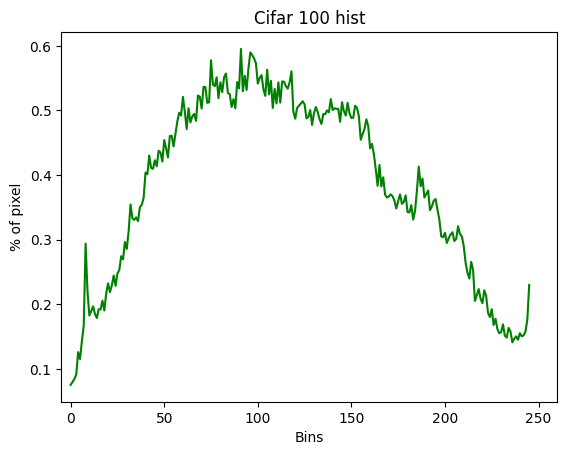

In [7]:
cifar_100_hist = read_2lv_dataset(5,251,"/data/backup/datasets/cifar100")
show_hist_fig("Cifar 100 hist", cifar_100_hist)

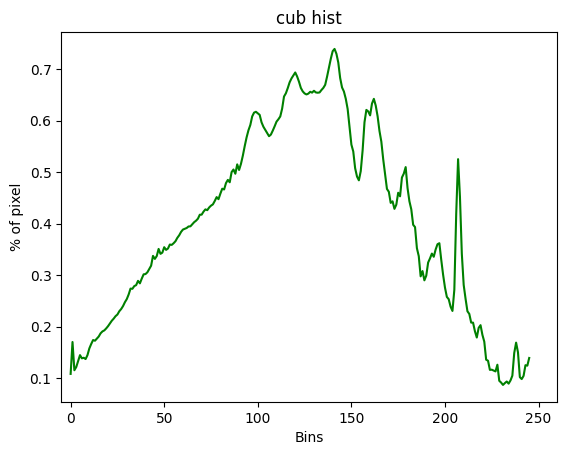

In [8]:
cub = read_2lv_dataset(5,251,"/data/datasets/Long-Workspace/ecom-product/Eval-data/CUB_200_2011")
show_hist_fig("cub hist", cub)

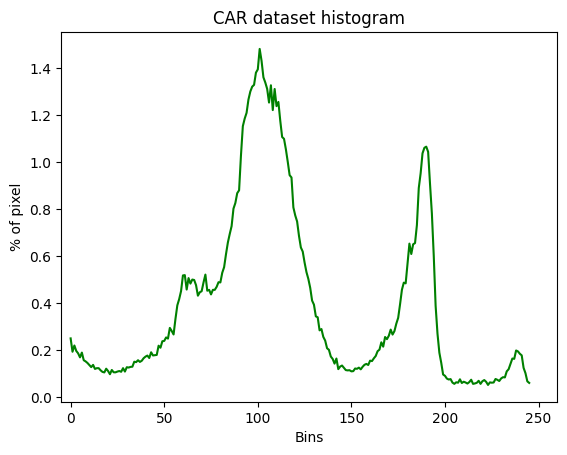

In [9]:
CAR_hist = read_2lv_dataset(5,251, "/data/datasets/Long-Workspace/ecom-product/Eval-data/car-dataset")
show_hist_fig("CAR dataset histogram", CAR_hist)

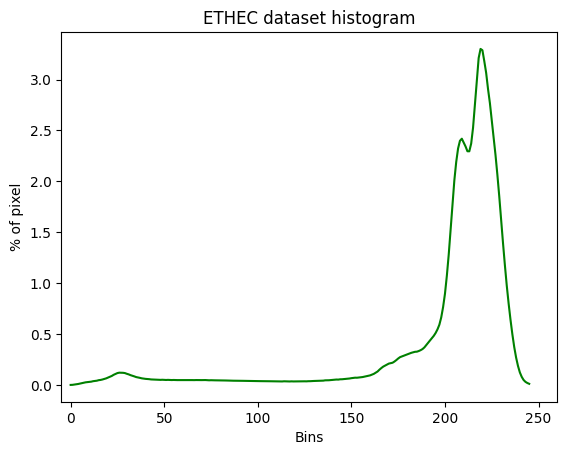

In [10]:
ETHEC_hist = read_3lv_dataset(5,251, '/data/datasets/Long-Workspace/ecom-product/Eval-data/ETHEC_dataset')
show_hist_fig("ETHEC dataset histogram", ETHEC_hist)

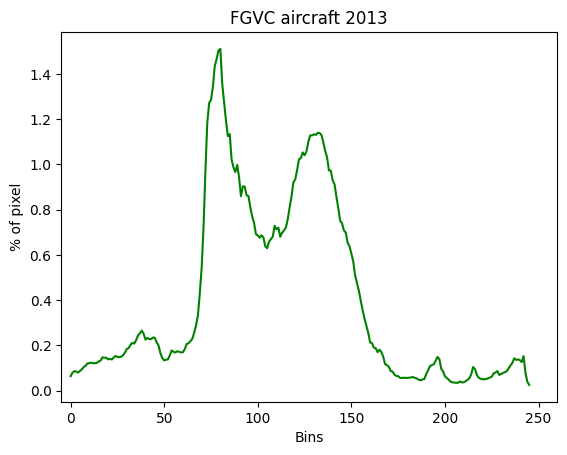

In [11]:
FGVC_AIRCRAFT_2013_hist = read_2lv_dataset(5,251,'/data/datasets/Long-Workspace/ecom-product/Eval-data/fgvc-aircraft-2013b')
show_hist_fig("FGVC aircraft 2013", FGVC_AIRCRAFT_2013_hist)

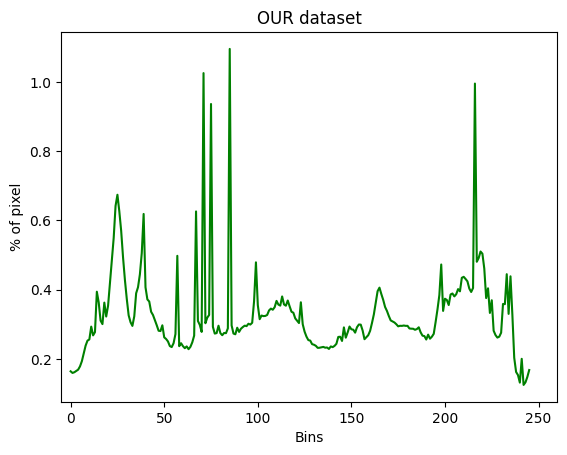

In [12]:
HOVA10_hist = read_2lv_dataset(5,251,'/data/datasets/HOVA10')
show_hist_fig("OUR dataset", HOVA10_hist)

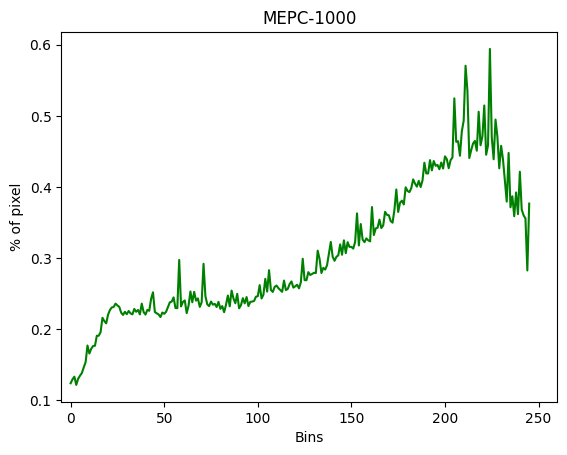

In [13]:
HOVA1000_hist = read_2lv_dataset(5,251,'/data/datasets/Long-Workspace/ecom-product/Eval-data/HOVA')
show_hist_fig("MEPC-1000", HOVA1000_hist)

/tmp/ipykernel_1565800/1438941436.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{y:.1f}' for y in ax.get_yticks()], fontsize=12)


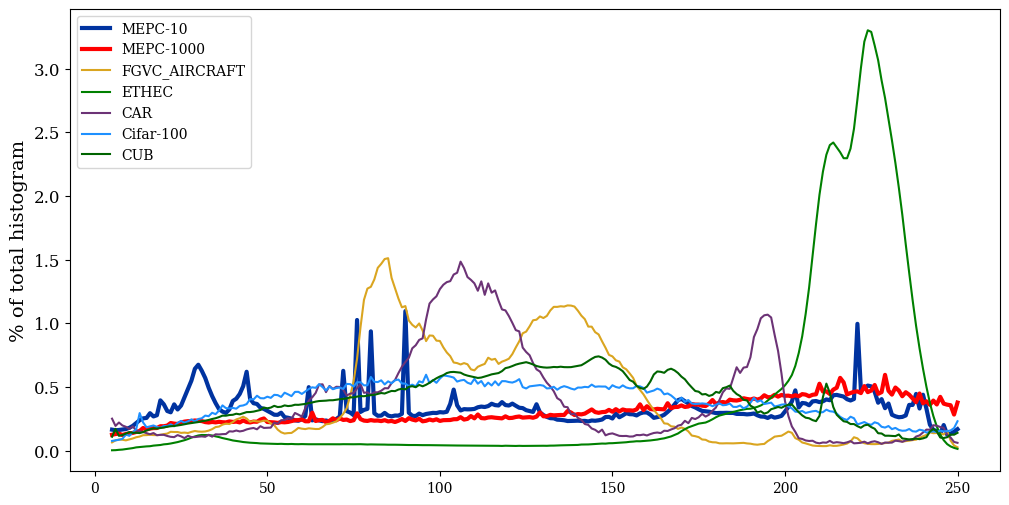

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual data)
x = np.arange(5,251)


# Set font to sans-serif
plt.rcParams['font.family'] = 'serif'

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each histogram
plt.plot(x, HOVA10_hist, color="#0033A0", label="MEPC-10", linewidth=3)
plt.plot(x, HOVA1000_hist, color="red", label="MEPC-1000", linewidth=3)
plt.plot(x, FGVC_AIRCRAFT_2013_hist, color="goldenrod", label="FGVC_AIRCRAFT")
plt.plot(x, ETHEC_hist, color="green", label="ETHEC")
plt.plot(x, CAR_hist, color="#6c3376", label="CAR")
plt.plot(x, cifar_100_hist, color="dodgerblue", label="Cifar-100")
plt.plot(x, cub, color="darkgreen", label="CUB")


# Customize tick labels
ax.set_yticklabels([f'{y:.1f}' for y in ax.get_yticks()], fontsize=12)
# ax.set_xlabel('Bin coefficient', fontsize=14)
ax.set_ylabel('% of total histogram', fontsize=14)

# Customize legend
ax.legend(loc='upper left')

# Save and show the plot
plt.savefig('histogram_0_256.pdf')
plt.show()


Vector heuristic

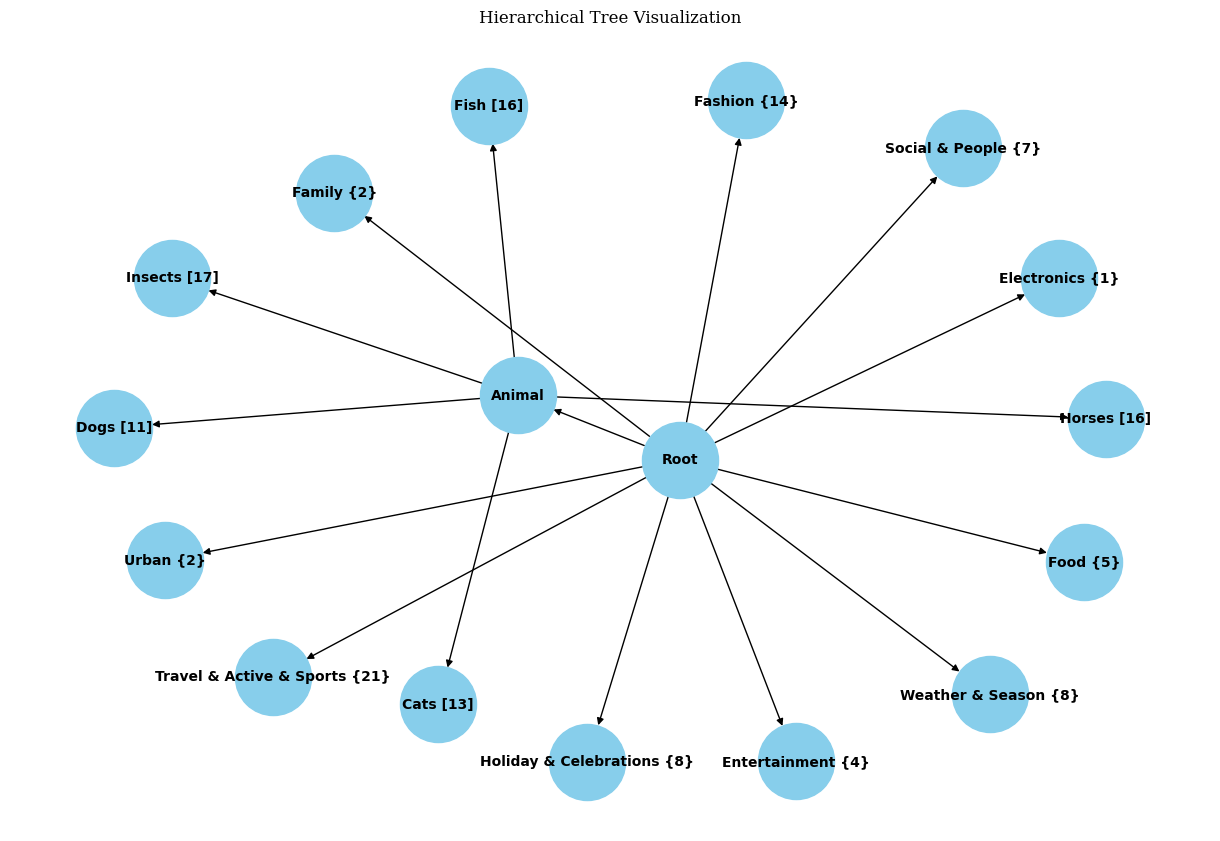

In [125]:
import matplotlib.pyplot as plt
import networkx as nx

# Tạo đồ thị
G = nx.DiGraph()

# Thêm các cạnh (các nút con)
edges = [
    ("Root", "Animal"), ("Animal", "Cats [13]"), ("Animal", "Dogs [11]"),
    ("Animal", "Fish [16]"), ("Animal", "Horses [16]"), ("Animal", "Insects [17]"),
    ("Root", "Electronics {1}"), ("Root", "Entertainment {4}"), ("Root", "Family {2}"),
    ("Root", "Fashion {14}"), ("Root", "Food {5}"), ("Root", "Holiday & Celebrations {8}"),
    ("Root", "Social & People {7}"), ("Root", "Travel & Active & Sports {21}"),
    ("Root", "Urban {2}"), ("Root", "Weather & Season {8}")
]

G.add_edges_from(edges)

# Vẽ đồ thị
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Hierarchical Tree Visualization")
plt.show()

Word cloud

In [71]:
root = '/data/datasets/Long-Workspace/ecom-product/Eval-data/HOVA/train'
classes  = os.listdir(root)

warehouse = []
for i in classes:
    for j in i.split("__"):
        warehouse.append(j)

for i in range(len(warehouse)):
    warehouse[i] = warehouse[i].replace("_"," ")
    warehouse[i] = warehouse[i].replace("&", "và")

In [72]:
len(warehouse)

3061

In [77]:
with open("result/output.txt", "a", encoding="utf-8") as file:
    file.write(text+'\n')

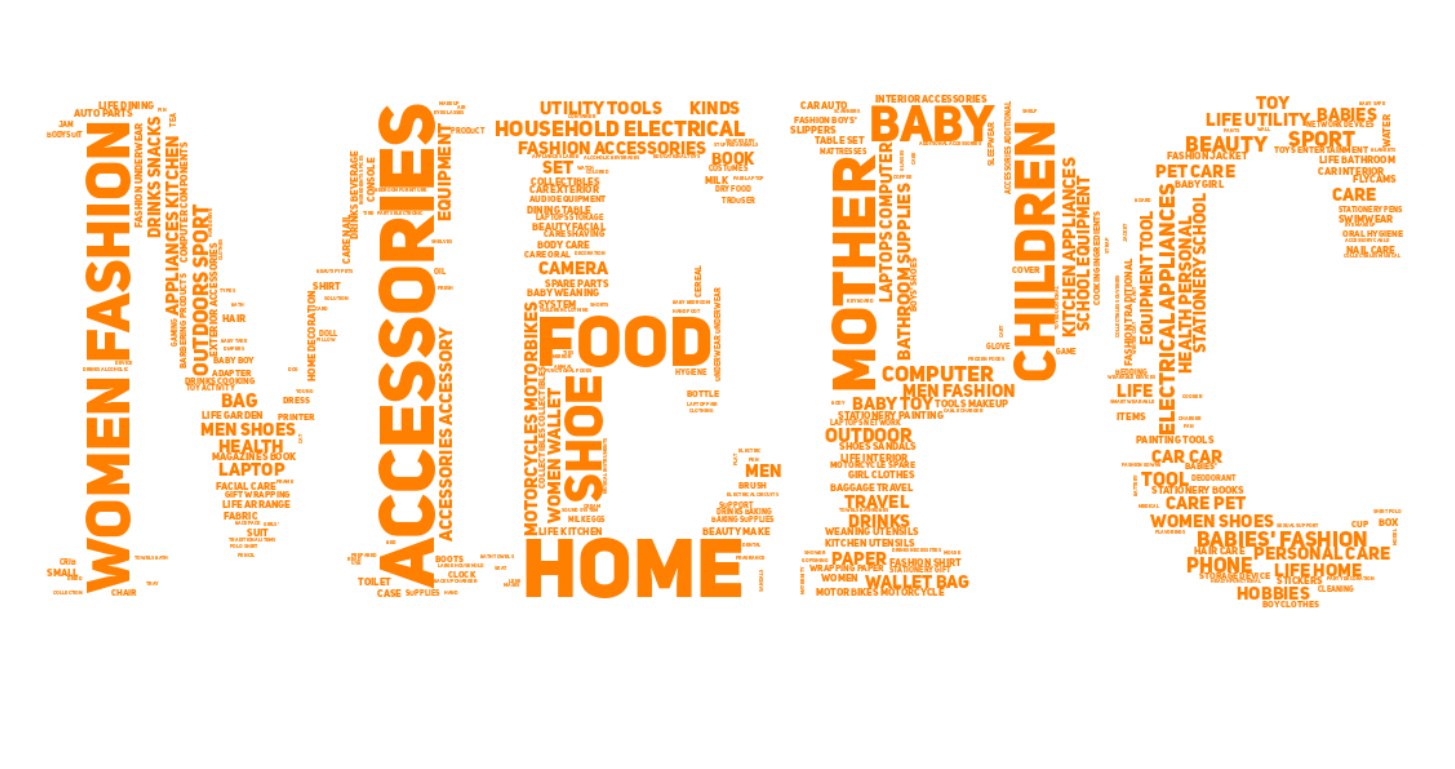

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import cv2  # Đảm bảo rằng bạn đã cài đặt OpenCV cho việc đọc ảnh
from PIL import Image

# Đọc dữ liệu từ file
text = open('/data/datasets/Long-Workspace/ecom-product/result/output.txt',
            mode='r', encoding='utf-8').read()

# Đọc ảnh mask và chuyển đổi sang định dạng numpy array
mask = np.array(cv2.imread('/data/datasets/Long-Workspace/ecom-product/Wordcloud/tmptmp.png', cv2.IMREAD_GRAYSCALE))

def one_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    # Màu vàng
    h = 30
    s = 100
    l = 50
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Tạo đối tượng WordCloud
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask,
               font_path='/data/datasets/Long-Workspace/ecom-product/Wordcloud/UniSansHeavy.otf',
               background_color="white",
               max_words=3000,
               max_font_size=300,
               color_func=one_color_func,
               width=mask.shape[1],
               height=mask.shape[0])

# Sinh word cloud từ dữ liệu văn bản
wc.generate(text)

# Thiết lập kích thước và độ phân giải của hình ảnh
plt.figure(figsize=(6,4), dpi=300)

# Hiển thị word cloud
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')

# Lưu dưới dạng PDF
plt.savefig('/data/datasets/Long-Workspace/ecom-product/Wordcloud/wordcloud.pdf', format='pdf', bbox_inches='tight')

# Đóng figure
